In [1]:
import pandas as pd
# import firebase_admin
# from firebase_admin import credentials
# from dotenv import load_dotenv
# import os
# from firebase_admin import firestore
from math import inf, nan
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import seaborn
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_log_error, accuracy_score
import pickle

In [2]:
# load_dotenv('auth.env')
# cred = credentials.Certificate(os.getenv('pathToServiceAccountKey'))
# firebase_admin.initialize_app(cred)
# DataBase = firestore.client()

In [ ]:
# docs = DataBase.collection("Vehicles_16_07").stream()
# count = 0

# data = []
# for doc in docs:
#     count = count + 1
#     data.append(doc.to_dict())

# print(count)
# originalData = pd.DataFrame(data)

In [2]:
originalData = pd.read_csv('vehiclesData.csv')
originalData = originalData.drop('Unnamed: 0', axis=1)
print(len(originalData))

20000


In [3]:
originalData.head(5)

,vehicleID,vehicleType,vehicleSpeed,vehicleMaxSpeed,vehicleLateralSpeed,vehicleAcceleration,vehicleMaxAcceleration,vehicleMaxDeceleration,"vehiclePosition(x,y)","vehicleGPSposition[longitude, latitude]",...,vehicleElectricityConsumption,vehicleFuelConsumption,vehicleStopState,vehicleLenght,vehicleWidth,vehicleHeight,vehiclePersonCapacity,vehicleChangeLaneToRight,vehicleChangeLaneToLeft,nextTLS
0,bike0,bike_bicycle,0.000000,50,0.0,0.000000,1.2,3.0,"[447.84028436018957, 2438.769146919431]","[-5.545437438666854, 33.897829539702855]",...,0.0,0.000000,0,1.6,0.65,1.7,1,False,False,"[{'tlsID': 'GS_cluster_8321435405_8321435406',..."
1,bus0,bus_bus,0.000000,85,0.0,0.000000,1.2,4.0,"[649.3594695362231, 2039.1466868748105]","[-5.543153068235368, 33.89427387593504]",...,0.0,1671.111111,0,12.0,2.50,3.4,85,False,False,[]
2,motorcycle0,motorcycle_motorcycle,0.000000,200,0.0,0.000000,6.0,10.0,"[1970.1460309747952, 2630.6699999999996]","[-5.529039887393824, 33.89989759276566]",...,0.0,391.944444,0,2.2,0.90,1.5,2,False,False,[{'tlsID': 'joinedS_1589896590_cluster_1589623...
3,veh0,veh_passenger,0.000000,200,0.0,0.000000,2.6,4.5,"[2232.466255980861, 3206.394043062201]","[-5.526358512873416, 33.90514321572194]",...,0.0,837.222222,0,5.0,1.80,1.5,4,False,False,[]
4,bike0,bike_bicycle,0.809562,50,0.0,0.809562,1.2,3.0,"[447.19277031658436, 2438.2830035768293]","[-5.545444304812082, 33.897825014831035]",...,0.0,0.000000,0,1.6,0.65,1.7,1,False,False,"[{'tlsID': 'GS_cluster_8321435405_8321435406',..."


In [4]:
originalData.columns

Index(['vehicleID', 'vehicleType', 'vehicleSpeed', 'vehicleMaxSpeed',
       'vehicleLateralSpeed', 'vehicleAcceleration', 'vehicleMaxAcceleration',
       'vehicleMaxDeceleration', 'vehiclePosition(x,y)',
       'vehicleGPSposition[longitude, latitude]', 'vehicleAngle',
       'vehicleDisplacement', 'vehicleAllowedSpeed', 'edgeID',
       'edgeLaneNumber', 'laneID', 'LaneMaxSpeed', 'vehicleSignals',
       'vehicleElectricityConsumption', 'vehicleFuelConsumption',
       'vehicleStopState', 'vehicleLenght', 'vehicleWidth', 'vehicleHeight',
       'vehiclePersonCapacity', 'vehicleChangeLaneToRight',
       'vehicleChangeLaneToLeft', 'nextTLS'],
      dtype='object')

In [5]:
# Vérification de l'existance des null
originalData.isna().sum()

vehicleID                                  0
vehicleType                                0
vehicleSpeed                               0
vehicleMaxSpeed                            0
vehicleLateralSpeed                        0
vehicleAcceleration                        0
vehicleMaxAcceleration                     0
vehicleMaxDeceleration                     0
vehiclePosition(x,y)                       0
vehicleGPSposition[longitude, latitude]    0
vehicleAngle                               0
vehicleDisplacement                        0
vehicleAllowedSpeed                        0
edgeID                                     0
edgeLaneNumber                             0
laneID                                     0
LaneMaxSpeed                               0
vehicleSignals                             0
vehicleElectricityConsumption              0
vehicleFuelConsumption                     0
vehicleStopState                           0
vehicleLenght                              0
vehicleWid

In [3]:
updatedData = originalData.copy().drop(['edgeID', 'laneID'], axis=1)
updatedData.columns

Index(['vehicleID', 'vehicleType', 'vehicleSpeed', 'vehicleMaxSpeed',
       'vehicleLateralSpeed', 'vehicleAcceleration', 'vehicleMaxAcceleration',
       'vehicleMaxDeceleration', 'vehiclePosition(x,y)',
       'vehicleGPSposition[longitude, latitude]', 'vehicleAngle',
       'vehicleDisplacement', 'vehicleAllowedSpeed', 'edgeLaneNumber',
       'LaneMaxSpeed', 'vehicleSignals', 'vehicleElectricityConsumption',
       'vehicleFuelConsumption', 'vehicleStopState', 'vehicleLenght',
       'vehicleWidth', 'vehicleHeight', 'vehiclePersonCapacity',
       'vehicleChangeLaneToRight', 'vehicleChangeLaneToLeft', 'nextTLS'],
      dtype='object')

In [4]:
def nombreDecimales(nombre):
    return len(str(nombre).split('.')[1])

In [6]:
# longitudes = []
# latitudes = []
# for GPScoord in updatedData['vehicleGPSposition[longitude, latitude]']:
#     longitudes.append(round(GPScoord[0], nombreDecimales(GPScoord[0])))
#     latitudes.append(round(GPScoord[1], nombreDecimales(GPScoord[1])))

# xPositions = []
# yPositions = []
# for position in updatedData['vehiclePosition(x,y)']:
#     xPositions.append(round(position[0], nombreDecimales(position[0])))
#     yPositions.append(round(position[1], nombreDecimales(position[1])))

# preCleanedData = updatedData.drop(['vehicleGPSposition[longitude, latitude]', 'vehiclePosition(x,y)'], axis=1)

# preCleanedData.insert(3, 'longitude', longitudes)
# preCleanedData.insert(4, 'latitude', latitudes)
# preCleanedData.insert(0, 'xPosition', xPositions)
# preCleanedData.insert(1, 'yPosition', yPositions)

# preCleanedData.head(5)

longitudes = []
latitudes = []
for GPScoord in updatedData['vehicleGPSposition[longitude, latitude]']:
    GPScoord = eval(GPScoord)
    longitudes.append(round(GPScoord[0], nombreDecimales(GPScoord[0])))
    latitudes.append(round(GPScoord[1], nombreDecimales(GPScoord[1])))

xPositions = []
yPositions = []
for position in updatedData['vehiclePosition(x,y)']:
    position = eval(position)
    xPositions.append(round(position[0], nombreDecimales(position[0])))
    yPositions.append(round(position[1], nombreDecimales(position[1])))

preCleanedData = updatedData.drop(['vehicleGPSposition[longitude, latitude]', 'vehiclePosition(x,y)'], axis=1)

preCleanedData.insert(3, 'longitude', longitudes)
preCleanedData.insert(4, 'latitude', latitudes)
preCleanedData.insert(0, 'xPosition', xPositions)
preCleanedData.insert(1, 'yPosition', yPositions)

preCleanedData.head(5)

,xPosition,yPosition,vehicleID,vehicleType,vehicleSpeed,longitude,latitude,vehicleMaxSpeed,vehicleLateralSpeed,vehicleAcceleration,...,vehicleElectricityConsumption,vehicleFuelConsumption,vehicleStopState,vehicleLenght,vehicleWidth,vehicleHeight,vehiclePersonCapacity,vehicleChangeLaneToRight,vehicleChangeLaneToLeft,nextTLS
0,447.840284,2438.769147,bike0,bike_bicycle,0.000000,-5.545437,33.897830,50,0.0,0.000000,...,0.0,0.000000,0,1.6,0.65,1.7,1,False,False,"[{'tlsID': 'GS_cluster_8321435405_8321435406',..."
1,649.359470,2039.146687,bus0,bus_bus,0.000000,-5.543153,33.894274,85,0.0,0.000000,...,0.0,1671.111111,0,12.0,2.50,3.4,85,False,False,[]
2,1970.146031,2630.670000,motorcycle0,motorcycle_motorcycle,0.000000,-5.529040,33.899898,200,0.0,0.000000,...,0.0,391.944444,0,2.2,0.90,1.5,2,False,False,[{'tlsID': 'joinedS_1589896590_cluster_1589623...
3,2232.466256,3206.394043,veh0,veh_passenger,0.000000,-5.526359,33.905143,200,0.0,0.000000,...,0.0,837.222222,0,5.0,1.80,1.5,4,False,False,[]
4,447.192770,2438.283004,bike0,bike_bicycle,0.809562,-5.545444,33.897825,50,0.0,0.809562,...,0.0,0.000000,0,1.6,0.65,1.7,1,False,False,"[{'tlsID': 'GS_cluster_8321435405_8321435406',..."


In [7]:
print(f"colonnes:{list(preCleanedData.columns)}\nnombre colonnes: {len(preCleanedData.columns)}")

colonnes:['xPosition', 'yPosition', 'vehicleID', 'vehicleType', 'vehicleSpeed', 'longitude', 'latitude', 'vehicleMaxSpeed', 'vehicleLateralSpeed', 'vehicleAcceleration', 'vehicleMaxAcceleration', 'vehicleMaxDeceleration', 'vehicleAngle', 'vehicleDisplacement', 'vehicleAllowedSpeed', 'edgeLaneNumber', 'LaneMaxSpeed', 'vehicleSignals', 'vehicleElectricityConsumption', 'vehicleFuelConsumption', 'vehicleStopState', 'vehicleLenght', 'vehicleWidth', 'vehicleHeight', 'vehiclePersonCapacity', 'vehicleChangeLaneToRight', 'vehicleChangeLaneToLeft', 'nextTLS']
nombre colonnes: 28


In [8]:
for column in preCleanedData.columns:
    if column != 'nextTLS':
        print(f"column name: {column}, number of it's unique values: {len(np.unique(preCleanedData[column]))}")

column name: xPosition, number of it's unique values: 19238
column name: yPosition, number of it's unique values: 19241
column name: vehicleID, number of it's unique values: 227
column name: vehicleType, number of it's unique values: 5
column name: vehicleSpeed, number of it's unique values: 19023
column name: longitude, number of it's unique values: 19241
column name: latitude, number of it's unique values: 19241
column name: vehicleMaxSpeed, number of it's unique values: 4
column name: vehicleLateralSpeed, number of it's unique values: 1
column name: vehicleAcceleration, number of it's unique values: 18783
column name: vehicleMaxAcceleration, number of it's unique values: 4
column name: vehicleMaxDeceleration, number of it's unique values: 4
column name: vehicleAngle, number of it's unique values: 11084
column name: vehicleDisplacement, number of it's unique values: 19018
column name: vehicleAllowedSpeed, number of it's unique values: 798
column name: edgeLaneNumber, number of it's u

* Les colonnes suivantes seront supprimées: <br>
vehicleElectricityConsumption, vehicleID, vehicleLateralSpeed et vehicleStopState

In [7]:
preCleanedData = preCleanedData.drop(['vehicleElectricityConsumption', 'vehicleID', 'vehicleLateralSpeed', 'vehicleStopState'], axis=1)
print(f"colonnes:{list(preCleanedData.columns)}\nnombre colonnes: {len(preCleanedData.columns)}")

colonnes:['xPosition', 'yPosition', 'vehicleType', 'vehicleSpeed', 'longitude', 'latitude', 'vehicleMaxSpeed', 'vehicleAcceleration', 'vehicleMaxAcceleration', 'vehicleMaxDeceleration', 'vehicleAngle', 'vehicleDisplacement', 'vehicleAllowedSpeed', 'edgeLaneNumber', 'LaneMaxSpeed', 'vehicleSignals', 'vehicleFuelConsumption', 'vehicleLenght', 'vehicleWidth', 'vehicleHeight', 'vehiclePersonCapacity', 'vehicleChangeLaneToRight', 'vehicleChangeLaneToLeft', 'nextTLS']
nombre colonnes: 24


In [28]:
preCleanedData.dtypes

xPosition                   float64
yPosition                   float64
vehicleType                  object
vehicleSpeed                float64
longitude                   float64
latitude                    float64
vehicleMaxSpeed               int64
vehicleAcceleration         float64
vehicleMaxAcceleration      float64
vehicleMaxDeceleration      float64
vehicleAngle                float64
vehicleDisplacement         float64
vehicleAllowedSpeed         float64
edgeLaneNumber                int64
LaneMaxSpeed                float64
vehicleSignals                int64
vehicleFuelConsumption      float64
vehicleLenght               float64
vehicleWidth                float64
vehicleHeight               float64
vehiclePersonCapacity         int64
vehicleChangeLaneToRight       bool
vehicleChangeLaneToLeft        bool
nextTLS                      object
dtype: object

nextTLS              --->             object <br>
vehicleType          --->             object

In [29]:
preCleanedData['vehicleType'] = preCleanedData['vehicleType'].astype(str)

In [8]:
# Je doit chercher le plus proche tf et le garder
def nextTrafficLight(tls:list):
    minDistance = float(inf)
    closestTL = None
    for tl in tls:
        if tl:
            if tl['distance']< minDistance:
                minDistance = tl['distance']
                closestTL = tl
    return closestTL

tfStates = []
tfDistances = []

for tf in preCleanedData['nextTLS']:
    result = nextTrafficLight(eval(tf))
    tfStates.append(result['state'] if result else nan)
    tfDistances.append(result['distance'] if result else nan)

In [9]:
preCleanedData = preCleanedData.drop('nextTLS', axis=1)

preCleanedData.insert(7, 'closestTfState', tfStates)
preCleanedData.insert(8, 'closestTfDistance', tfDistances)

preCleanedData.head(5)

,xPosition,yPosition,vehicleType,vehicleSpeed,longitude,latitude,vehicleMaxSpeed,closestTfState,closestTfDistance,vehicleAcceleration,...,edgeLaneNumber,LaneMaxSpeed,vehicleSignals,vehicleFuelConsumption,vehicleLenght,vehicleWidth,vehicleHeight,vehiclePersonCapacity,vehicleChangeLaneToRight,vehicleChangeLaneToLeft
0,447.840284,2438.769147,bike_bicycle,0.000000,-5.545437,33.897830,50,G,275.390000,0.000000,...,1,13.89,0,0.000000,1.6,0.65,1.7,1,False,False
1,649.359470,2039.146687,bus_bus,0.000000,-5.543153,33.894274,85,NaN,NaN,0.000000,...,2,13.89,0,1671.111111,12.0,2.50,3.4,85,False,False
2,1970.146031,2630.670000,motorcycle_motorcycle,0.000000,-5.529040,33.899898,200,r,382.210000,0.000000,...,1,13.89,0,391.944444,2.2,0.90,1.5,2,False,False
3,2232.466256,3206.394043,veh_passenger,0.000000,-5.526359,33.905143,200,NaN,NaN,0.000000,...,1,13.89,0,837.222222,5.0,1.80,1.5,4,False,False
4,447.192770,2438.283004,bike_bicycle,0.809562,-5.545444,33.897825,50,G,274.580438,0.809562,...,1,13.89,0,0.000000,1.6,0.65,1.7,1,False,False


In [33]:
preCleanedData.dtypes

xPosition                   float64
yPosition                   float64
vehicleType                  object
vehicleSpeed                float64
longitude                   float64
latitude                    float64
vehicleMaxSpeed               int64
closestTfState               object
closestTfDistance           float64
vehicleAcceleration         float64
vehicleMaxAcceleration      float64
vehicleMaxDeceleration      float64
vehicleAngle                float64
vehicleDisplacement         float64
vehicleAllowedSpeed         float64
edgeLaneNumber                int64
LaneMaxSpeed                float64
vehicleSignals                int64
vehicleFuelConsumption      float64
vehicleLenght               float64
vehicleWidth                float64
vehicleHeight               float64
vehiclePersonCapacity         int64
vehicleChangeLaneToRight       bool
vehicleChangeLaneToLeft        bool
dtype: object

closestTfState               <br>

In [34]:
preCleanedData['closestTfState'] = preCleanedData['closestTfState'].astype(str)

In [10]:
leClosestTfState = LabelEncoder()

leClosestTfState.fit(['n', 'r', 'y', 'G', 'g'])

encoded_states = leClosestTfState.transform(preCleanedData['closestTfState'])
encoded_states

array([0, 2, 3, ..., 2, 2, 3])

In [11]:
# Créer un OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Ajuster l'encodeur aux colonnes catégorielles
encoder.fit(preCleanedData[['vehicleChangeLaneToLeft', 'vehicleChangeLaneToRight', 'vehicleType', 'closestTfState']])

# Transformer les données encodées
encoded_data = encoder.transform(preCleanedData[['vehicleChangeLaneToLeft', 'vehicleChangeLaneToRight', 'vehicleType', 'closestTfState']])

# Créer un nouveau DataFrame avec les données encodées
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['vehicleChangeLaneToLeft', 'vehicleChangeLaneToRight', 'vehicleType', 'closestTfState']))
encoded_df

,vehicleChangeLaneToLeft_False,vehicleChangeLaneToLeft_True,vehicleChangeLaneToRight_False,vehicleChangeLaneToRight_True,vehicleType_bike_bicycle,vehicleType_bus_bus,vehicleType_motorcycle_motorcycle,vehicleType_truck_truck,vehicleType_veh_passenger,closestTfState_G,closestTfState_g,closestTfState_r,closestTfState_y,closestTfState_nan
0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
19996,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
19997,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
19998,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [12]:
pickle.dump(encoder, open('vehicleOneHotEncoder', 'wb'))

In [ ]:
pickle.dump(leClosestTfState, open('closestTfStateLabelEncoder', 'wb'))

In [13]:
encoded_df = encoded_df.drop(['vehicleChangeLaneToLeft_False', 'vehicleChangeLaneToRight_False'], axis=1)
preCleanedData = preCleanedData.drop(['vehicleChangeLaneToLeft', 'vehicleChangeLaneToRight', 'vehicleType', 'closestTfState'], axis=1)

In [14]:
nonOrderedPreCleanedData = pd.concat([preCleanedData, encoded_df], axis=1)
nonOrderedPreCleanedData

,xPosition,yPosition,vehicleSpeed,longitude,latitude,vehicleMaxSpeed,closestTfDistance,vehicleAcceleration,vehicleMaxAcceleration,vehicleMaxDeceleration,...,vehicleType_bike_bicycle,vehicleType_bus_bus,vehicleType_motorcycle_motorcycle,vehicleType_truck_truck,vehicleType_veh_passenger,closestTfState_G,closestTfState_g,closestTfState_r,closestTfState_y,closestTfState_nan
0,447.840284,2438.769147,0.000000,-5.545437,33.897830,50,275.390000,0.000000,1.2,3.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,649.359470,2039.146687,0.000000,-5.543153,33.894274,85,NaN,0.000000,1.2,4.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1970.146031,2630.670000,0.000000,-5.529040,33.899898,200,382.210000,0.000000,6.0,10.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,2232.466256,3206.394043,0.000000,-5.526359,33.905143,200,NaN,0.000000,2.6,4.5,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,447.192770,2438.283004,0.809562,-5.545444,33.897825,50,274.580438,0.809562,1.2,3.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,1585.548966,2394.616150,6.829374,-5.533133,33.897685,200,NaN,-4.651948,6.0,10.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
19996,1644.598901,2715.914133,12.648719,-5.532580,33.900593,200,222.395648,-0.024531,6.0,10.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
19997,1262.149369,2095.180507,8.238430,-5.536547,33.894915,200,NaN,1.062689,6.0,10.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
19998,2218.803422,3042.454182,0.000000,-5.526463,33.903663,200,NaN,-0.000460,6.0,10.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [15]:
orderedPreCleanedData = pd.concat([nonOrderedPreCleanedData.drop(['closestTfState_G', 'closestTfState_g', 'closestTfState_r', 'closestTfState_y', 'closestTfState_nan'], axis=1), pd.DataFrame(encoded_states, columns=['closestTfState'])], axis=1)
orderedPreCleanedData

,xPosition,yPosition,vehicleSpeed,longitude,latitude,vehicleMaxSpeed,closestTfDistance,vehicleAcceleration,vehicleMaxAcceleration,vehicleMaxDeceleration,...,vehicleHeight,vehiclePersonCapacity,vehicleChangeLaneToLeft_True,vehicleChangeLaneToRight_True,vehicleType_bike_bicycle,vehicleType_bus_bus,vehicleType_motorcycle_motorcycle,vehicleType_truck_truck,vehicleType_veh_passenger,closestTfState
0,447.840284,2438.769147,0.000000,-5.545437,33.897830,50,275.390000,0.000000,1.2,3.0,...,1.7,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
1,649.359470,2039.146687,0.000000,-5.543153,33.894274,85,NaN,0.000000,1.2,4.0,...,3.4,85,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2
2,1970.146031,2630.670000,0.000000,-5.529040,33.899898,200,382.210000,0.000000,6.0,10.0,...,1.5,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3
3,2232.466256,3206.394043,0.000000,-5.526359,33.905143,200,NaN,0.000000,2.6,4.5,...,1.5,4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2
4,447.192770,2438.283004,0.809562,-5.545444,33.897825,50,274.580438,0.809562,1.2,3.0,...,1.7,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,1585.548966,2394.616150,6.829374,-5.533133,33.897685,200,NaN,-4.651948,6.0,10.0,...,1.5,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2
19996,1644.598901,2715.914133,12.648719,-5.532580,33.900593,200,222.395648,-0.024531,6.0,10.0,...,1.5,2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,3
19997,1262.149369,2095.180507,8.238430,-5.536547,33.894915,200,NaN,1.062689,6.0,10.0,...,1.5,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2
19998,2218.803422,3042.454182,0.000000,-5.526463,33.903663,200,NaN,-0.000460,6.0,10.0,...,1.5,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2


<Axes: >

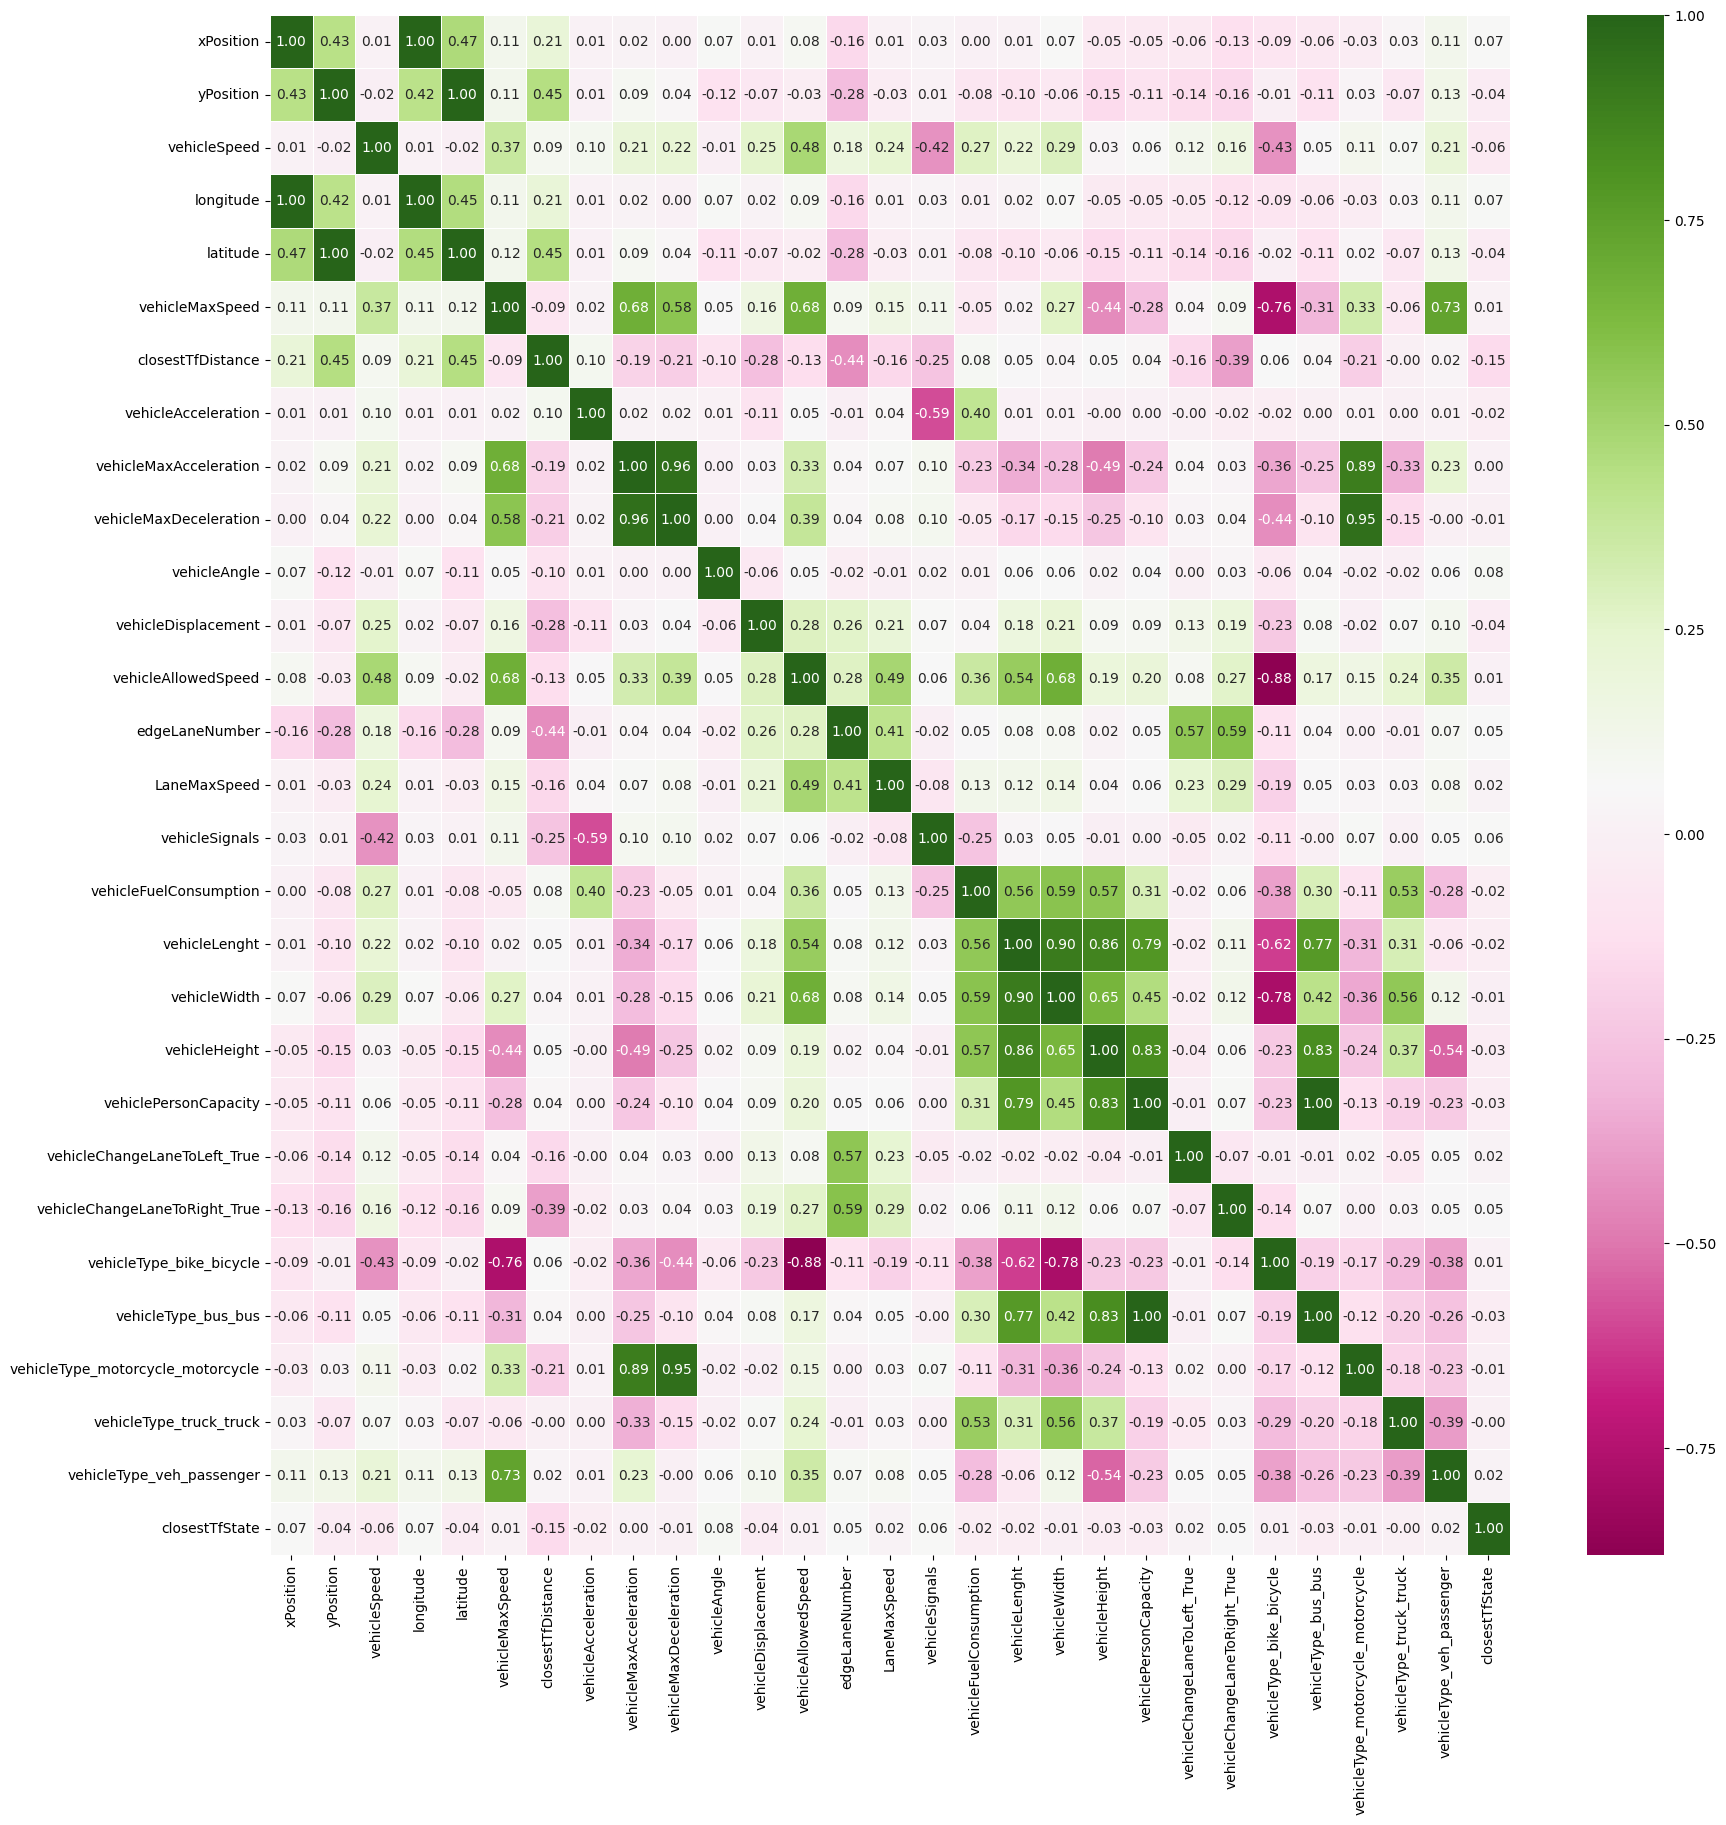

In [42]:
plt.figure(figsize=(20,20))
correlationMatrix_regardingOrder = orderedPreCleanedData.corr()
seaborn.heatmap(correlationMatrix_regardingOrder, annot=True, cmap="PiYG", fmt=".2f", linewidth=.5)

In [43]:
threshold = 0.9

for i in range(len(correlationMatrix_regardingOrder.columns)):
    for j in range(i):
        if abs(correlationMatrix_regardingOrder.iloc[i, j]) > threshold:
            print(f"{correlationMatrix_regardingOrder.columns[i]} is correlated with {correlationMatrix_regardingOrder.columns[j]}")

longitude is correlated with xPosition
latitude is correlated with yPosition
vehicleMaxDeceleration is correlated with vehicleMaxAcceleration
vehicleWidth is correlated with vehicleLenght
vehicleType_bus_bus is correlated with vehiclePersonCapacity
vehicleType_motorcycle_motorcycle is correlated with vehicleMaxDeceleration


In [45]:
orderedPreCleanedData.columns.to_list()

['xPosition',
 'yPosition',
 'vehicleSpeed',
 'longitude',
 'latitude',
 'vehicleMaxSpeed',
 'closestTfDistance',
 'vehicleAcceleration',
 'vehicleMaxAcceleration',
 'vehicleMaxDeceleration',
 'vehicleAngle',
 'vehicleDisplacement',
 'vehicleAllowedSpeed',
 'edgeLaneNumber',
 'LaneMaxSpeed',
 'vehicleSignals',
 'vehicleFuelConsumption',
 'vehicleLenght',
 'vehicleWidth',
 'vehicleHeight',
 'vehiclePersonCapacity',
 'vehicleChangeLaneToLeft_True',
 'vehicleChangeLaneToRight_True',
 'vehicleType_bike_bicycle',
 'vehicleType_bus_bus',
 'vehicleType_motorcycle_motorcycle',
 'vehicleType_truck_truck',
 'vehicleType_veh_passenger',
 'closestTfState']

* Réalisation du modèle using features selection (RFE)

In [46]:
features = orderedPreCleanedData[['xPosition',
                                'yPosition',
                                'longitude',
                                'latitude',
                                'vehicleMaxSpeed',
                                'closestTfDistance',
                                'vehicleAcceleration',
                                'vehicleMaxAcceleration',
                                'vehicleMaxDeceleration',
                                'vehicleAngle',
                                'vehicleDisplacement',
                                'vehicleAllowedSpeed',
                                'edgeLaneNumber',
                                'LaneMaxSpeed',
                                'vehicleSignals',
                                'vehicleFuelConsumption',
                                'vehicleLenght',
                                'vehicleWidth',
                                'vehicleHeight',
                                'vehiclePersonCapacity',
                                'vehicleChangeLaneToLeft_True',
                                'vehicleChangeLaneToRight_True',
                                'vehicleType_bike_bicycle',
                                'vehicleType_bus_bus',
                                'vehicleType_motorcycle_motorcycle',
                                'vehicleType_truck_truck',
                                'vehicleType_veh_passenger',
                                'closestTfState']]

target = orderedPreCleanedData['vehicleSpeed']

firstModel = LinearRegression()

rfe = RFE(firstModel)

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

imputer = SimpleImputer()

X_train_Imputed = imputer.fit_transform(X_train)
X_test_Imputed = imputer.fit_transform(X_test)

rfe.fit(X_train_Imputed, y_train)

selectedFeatures = rfe.get_feature_names_out()
selectedFeatures

array(['x0', 'x1', 'x2', 'x3', 'x6', 'x7', 'x8', 'x12', 'x14', 'x18',
       'x20', 'x21', 'x24', 'x26'], dtype=object)

In [47]:
allFeaturesName = ['xPosition',
                    'yPosition',
                    'longitude',
                    'latitude',
                    'vehicleMaxSpeed',
                    'closestTfDistance',
                    'vehicleAcceleration',
                    'vehicleMaxAcceleration',
                    'vehicleMaxDeceleration',
                    'vehicleAngle',
                    'vehicleDisplacement',
                    'vehicleAllowedSpeed',
                    'edgeLaneNumber',
                    'LaneMaxSpeed',
                    'vehicleSignals',
                    'vehicleFuelConsumption',
                    'vehicleLenght',
                    'vehicleWidth',
                    'vehicleHeight',
                    'vehiclePersonCapacity',
                    'vehicleChangeLaneToLeft_True',
                    'vehicleChangeLaneToRight_True',
                    'vehicleType_bike_bicycle',
                    'vehicleType_bus_bus',
                    'vehicleType_motorcycle_motorcycle',
                    'vehicleType_truck_truck',
                    'vehicleType_veh_passenger',
                    'closestTfState']

selectedFeaturesListe = selectedFeatures.tolist()
selectedFeaturesName = []

for feature in selectedFeaturesListe:
    selectedFeaturesName.append(allFeaturesName[int(feature.split('x')[1])])

selectedFeaturesName

['xPosition',
 'yPosition',
 'longitude',
 'latitude',
 'vehicleAcceleration',
 'vehicleMaxAcceleration',
 'vehicleMaxDeceleration',
 'edgeLaneNumber',
 'vehicleSignals',
 'vehicleHeight',
 'vehicleChangeLaneToLeft_True',
 'vehicleChangeLaneToRight_True',
 'vehicleType_motorcycle_motorcycle',
 'vehicleType_veh_passenger']

In [48]:
y_pred = rfe.predict(X_test_Imputed)

# Calcule de la somme des carrés des résidus (RSS)
rss = np.sum(np.square(y_pred - y_test))

# Calcule de l'erreur quadratique moyenne (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calcule de la racine de la MSE (RMSE)
rmse = np.sqrt(mse)

# Calcule de Root Mean Squared Log Error (RMSLE)
# rmsle = root_mean_squared_log_error(y_test, y_pred) """ Can't be used when targets contain negative values """

# Calcule de R-squared
r2 = r2_score(y_test, y_pred)

print("Residual Sum of Squares (RSS):", rss)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
# print("Root Mean Squared Log Error (RMSLE):", rmsle)
print("R-squared:", r2)

Residual Sum of Squares (RSS): 65498.10913706933
Mean Squared Error (MSE): 10.916351522844888
Root Mean Squared Error (RMSE): 3.3039902425468646
R-squared: 0.4910313974846464


* Réalisation du modèle en utilisant l'analyse des données sur la matrice de corrélation

In [49]:
secondModel = LinearRegression()

imputer = SimpleImputer()

X_train, X_test, y_train, y_test = train_test_split(features.drop(['longitude', 'latitude', 'vehicleMaxDeceleration', 'vehicleWidth', 'vehiclePersonCapacity'], axis=1), target, test_size=0.3, random_state=42)
X_train_Imputed = imputer.fit_transform(X_train)
X_test_Imputed = imputer.fit_transform(X_test)

secondModel.fit(X_train_Imputed, y_train)

LinearRegression()

In [50]:
y_pred = secondModel.predict(X_test_Imputed)

# Calcule de la somme des carrés des résidus (RSS)
rss = np.sum(np.square(y_pred - y_test))

# Calculate mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate root mean squared error (RMSE)
rmse = np.sqrt(mse)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

print("Residual Sum of Squares (RSS):", rss)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared:", r2)

Residual Sum of Squares (RSS): 57258.81782754698
Mean Squared Error (MSE): 9.543136304591163
Root Mean Squared Error (RMSE): 3.0891967086268823
R-squared: 0.5550567661368708


* combinés

In [51]:
combinedModel = LinearRegression()

rfe2 = RFE(combinedModel)
rfe2.fit(X_train_Imputed, y_train)

selectedFeatures = rfe2.get_feature_names_out()
selectedFeatures

array(['x2', 'x5', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20',
       'x21'], dtype=object)

In [52]:
allFeaturesName = ['xPosition',
                    'yPosition',
                    'longitude',
                    'latitude',
                    'vehicleMaxSpeed',
                    'closestTfDistance',
                    'vehicleAcceleration',
                    'vehicleMaxAcceleration',
                    'vehicleMaxDeceleration',
                    'vehicleAngle',
                    'vehicleDisplacement',
                    'vehicleAllowedSpeed',
                    'edgeLaneNumber',
                    'LaneMaxSpeed',
                    'vehicleSignals',
                    'vehicleFuelConsumption',
                    'vehicleLenght',
                    'vehicleWidth',
                    'vehicleHeight',
                    'vehiclePersonCapacity',
                    'vehicleChangeLaneToLeft_True',
                    'vehicleChangeLaneToRight_True',
                    'vehicleType_bike_bicycle',
                    'vehicleType_bus_bus',
                    'vehicleType_motorcycle_motorcycle',
                    'vehicleType_truck_truck',
                    'vehicleType_veh_passenger',
                    'closestTfState']

selectedFeaturesListe = selectedFeatures.tolist()
selectedFeaturesName = []

for feature in selectedFeaturesListe:
    selectedFeaturesName.append(allFeaturesName[int(feature.split('x')[1])])

selectedFeaturesName

['longitude',
 'closestTfDistance',
 'LaneMaxSpeed',
 'vehicleSignals',
 'vehicleFuelConsumption',
 'vehicleLenght',
 'vehicleWidth',
 'vehicleHeight',
 'vehiclePersonCapacity',
 'vehicleChangeLaneToLeft_True',
 'vehicleChangeLaneToRight_True']

In [53]:
y_pred = rfe2.predict(X_test_Imputed)

# Calcule de la somme des carrés des résidus (RSS)
rss = np.sum(np.square(y_pred - y_test))

# Calculate mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate root mean squared error (RMSE)
rmse = np.sqrt(mse)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

print("Residual Sum of Squares (RSS):", rss)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared:", r2)

Residual Sum of Squares (RSS): 100245.36288016877
Mean Squared Error (MSE): 16.70756048002813
Root Mean Squared Error (RMSE): 4.087488285001943
R-squared: 0.2210196152840126


* Changer de modèle

<Axes: >

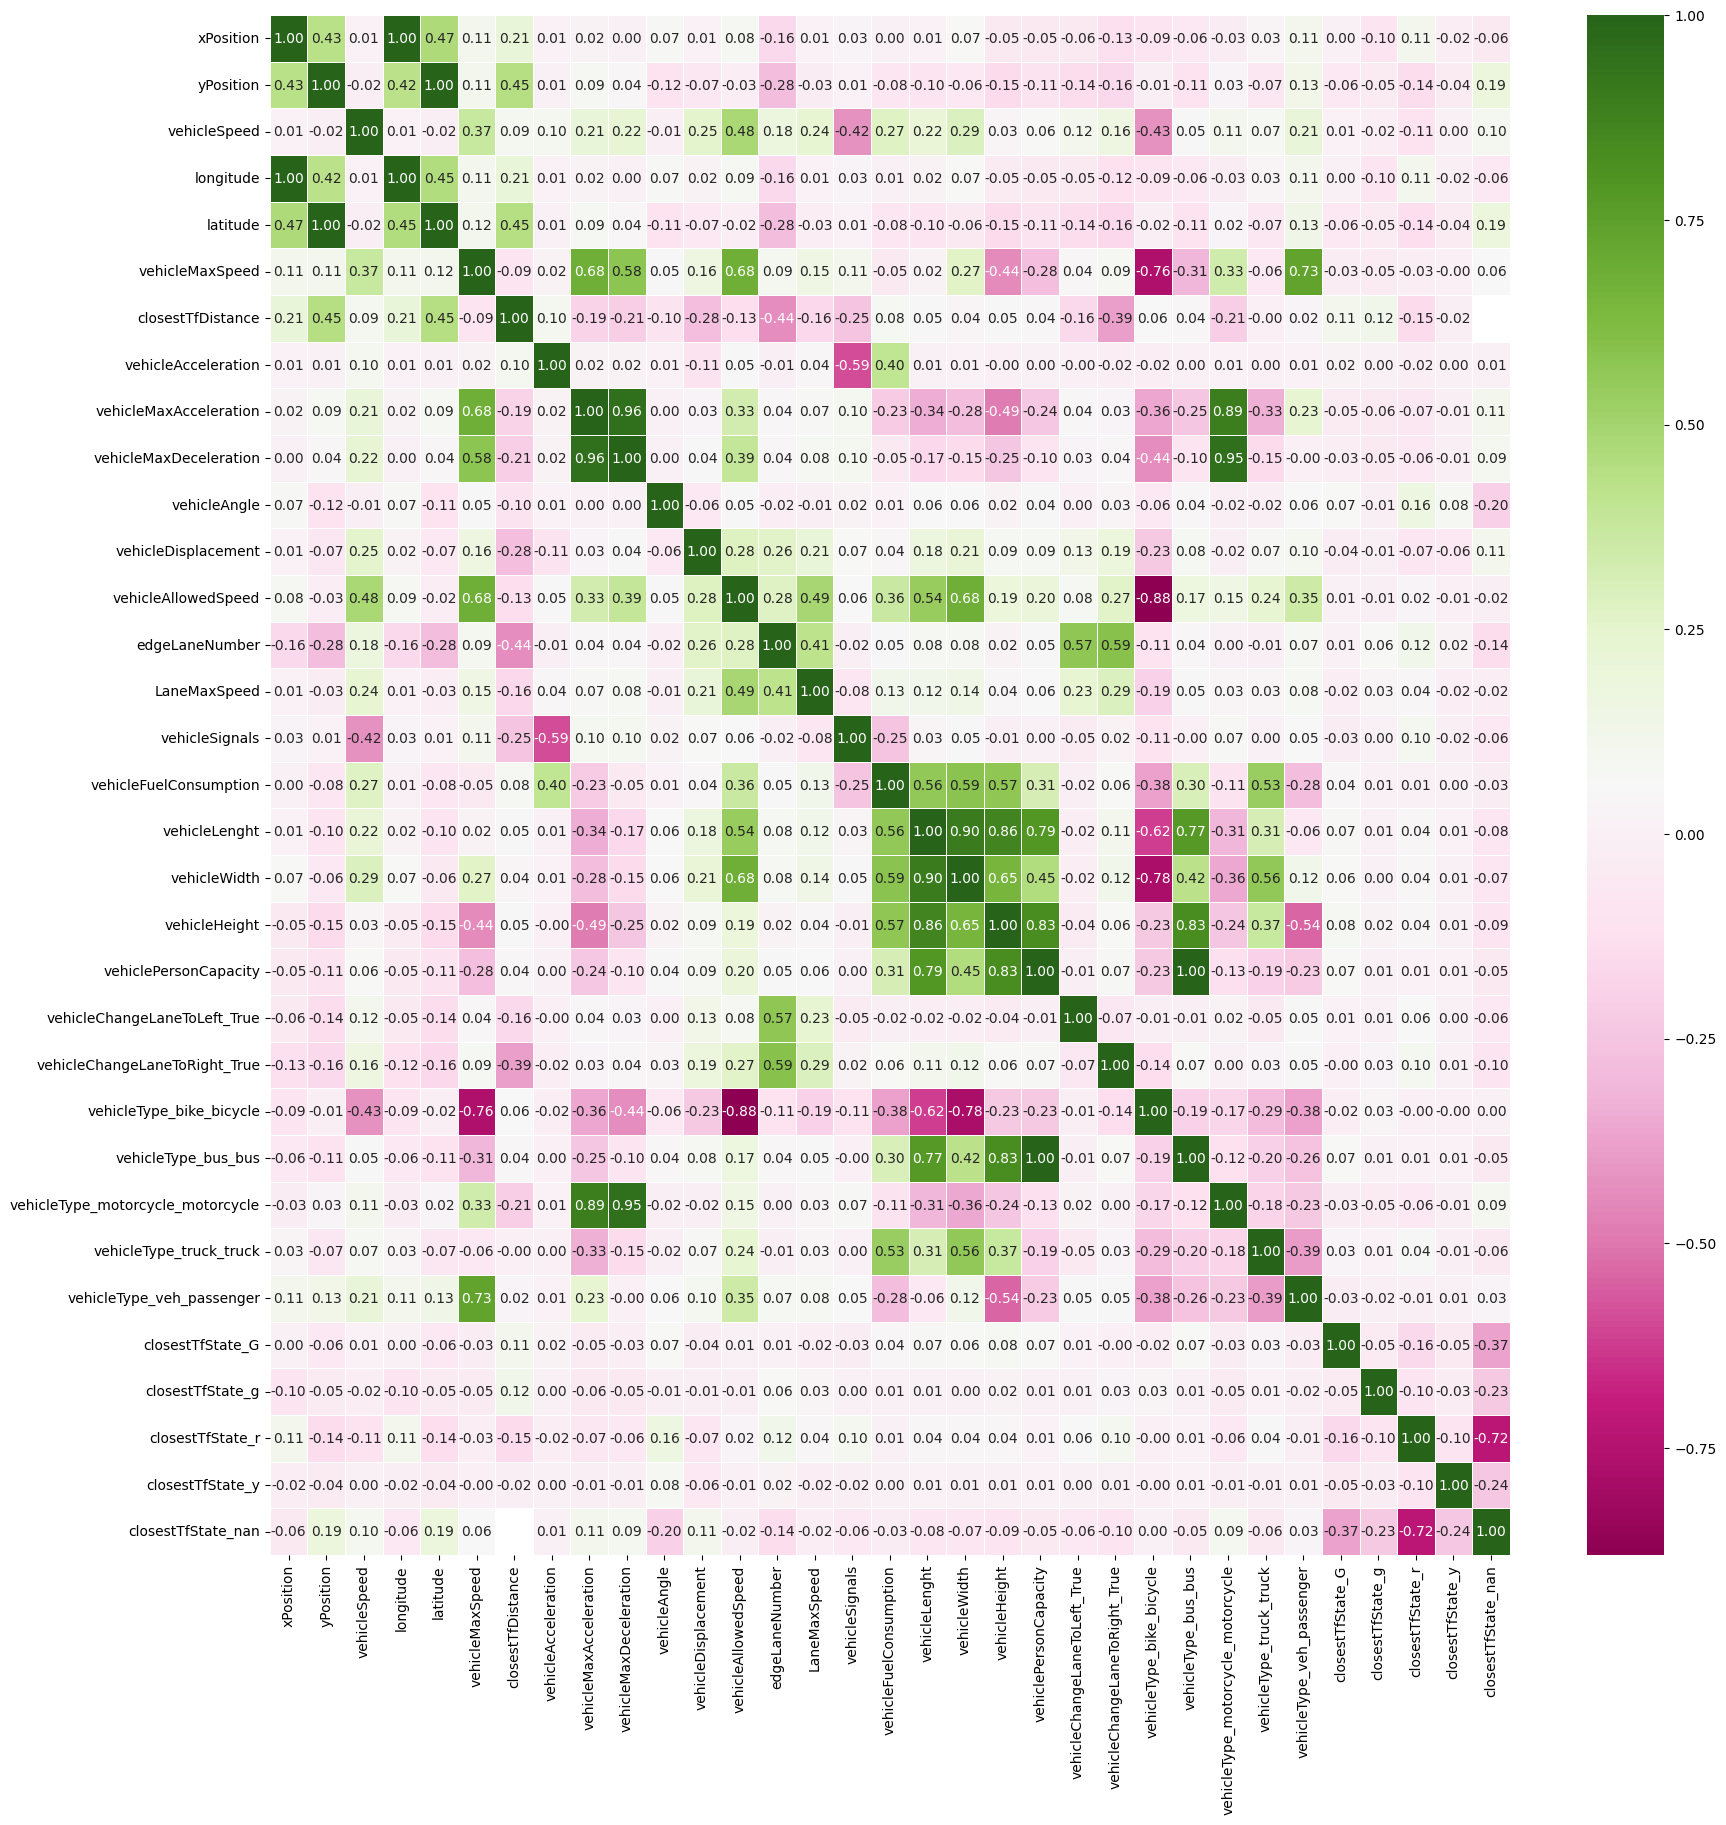

In [16]:
plt.figure(figsize=(20,20))
correlationMatrix_noOrder = nonOrderedPreCleanedData.corr()
seaborn.heatmap(correlationMatrix_noOrder, annot=True, cmap="PiYG", fmt=".2f", linewidth=.5)

In [19]:
threshold = 0.8

for i in range(len(correlationMatrix_noOrder.columns)):
    for j in range(i):
        if abs(correlationMatrix_noOrder.iloc[i, j]) > threshold:
            print(f"{correlationMatrix_noOrder.columns[i]} is correlated with {correlationMatrix_noOrder.columns[j]}")

longitude is correlated with xPosition
latitude is correlated with yPosition
vehicleMaxDeceleration is correlated with vehicleMaxAcceleration
vehicleWidth is correlated with vehicleLenght
vehicleHeight is correlated with vehicleLenght
vehiclePersonCapacity is correlated with vehicleHeight
vehicleType_bike_bicycle is correlated with vehicleAllowedSpeed
vehicleType_bus_bus is correlated with vehicleHeight
vehicleType_bus_bus is correlated with vehiclePersonCapacity
vehicleType_motorcycle_motorcycle is correlated with vehicleMaxAcceleration
vehicleType_motorcycle_motorcycle is correlated with vehicleMaxDeceleration


In [20]:
nonOrderedPreCleanedData.columns.to_list()

['xPosition',
 'yPosition',
 'vehicleSpeed',
 'longitude',
 'latitude',
 'vehicleMaxSpeed',
 'closestTfDistance',
 'vehicleAcceleration',
 'vehicleMaxAcceleration',
 'vehicleMaxDeceleration',
 'vehicleAngle',
 'vehicleDisplacement',
 'vehicleAllowedSpeed',
 'edgeLaneNumber',
 'LaneMaxSpeed',
 'vehicleSignals',
 'vehicleFuelConsumption',
 'vehicleLenght',
 'vehicleWidth',
 'vehicleHeight',
 'vehiclePersonCapacity',
 'vehicleChangeLaneToLeft_True',
 'vehicleChangeLaneToRight_True',
 'vehicleType_bike_bicycle',
 'vehicleType_bus_bus',
 'vehicleType_motorcycle_motorcycle',
 'vehicleType_truck_truck',
 'vehicleType_veh_passenger',
 'closestTfState_G',
 'closestTfState_g',
 'closestTfState_r',
 'closestTfState_y',
 'closestTfState_nan']

In [21]:
features = nonOrderedPreCleanedData[['xPosition',
                                    'yPosition',
                                    'longitude',
                                    'latitude',
                                    'vehicleMaxSpeed',
                                    'closestTfDistance',
                                    'vehicleAcceleration',
                                    'vehicleMaxAcceleration',
                                    'vehicleMaxDeceleration',
                                    'vehicleAngle',
                                    'vehicleDisplacement',
                                    'vehicleAllowedSpeed',
                                    'edgeLaneNumber',
                                    'LaneMaxSpeed',
                                    'vehicleSignals',
                                    'vehicleFuelConsumption',
                                    'vehicleLenght',
                                    'vehicleWidth',
                                    'vehicleHeight',
                                    'vehiclePersonCapacity',
                                    'vehicleChangeLaneToLeft_True',
                                    'vehicleChangeLaneToRight_True',
                                    'vehicleType_bike_bicycle',
                                    'vehicleType_bus_bus',
                                    'vehicleType_motorcycle_motorcycle',
                                    'vehicleType_truck_truck',
                                    'vehicleType_veh_passenger',
                                    'closestTfState_G',
                                    'closestTfState_g',
                                    'closestTfState_nan',
                                    'closestTfState_r',
                                    'closestTfState_y']]

target = nonOrderedPreCleanedData['vehicleSpeed']

X_train, X_test, y_train, y_test = train_test_split(features.drop(['longitude', 'latitude', 'vehicleMaxDeceleration', 'vehicleLenght', 'vehiclePersonCapacity', 'vehicleMaxAcceleration', 'vehicleAllowedSpeed', 'vehicleHeight'], axis=1), target, test_size=0.3, random_state=42)

In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 4, 6]
}

# Initialize the Random Forest Regressor
model = RandomForestRegressor()

In [28]:
# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

RandomForestRegressor()

In [29]:
y_pred = best_model.predict(X_test)

# Calcule de la somme des carrés des résidus (RSS)
rss = np.sum(np.square(y_pred - y_test))

# Calculate mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate root mean squared error (RMSE)
rmse = np.sqrt(mse)

# Calcule de Root Mean Squared Log Error (RMSLE)
rmsle = root_mean_squared_log_error(y_test, y_pred)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

print("Root Mean Squared Log Error (RMSLE):", rmsle)
print("Residual Sum of Squares (RSS):", rss)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared:", r2)

Root Mean Squared Log Error (RMSLE): 0.16308771762837884
Residual Sum of Squares (RSS): 7591.169763749207
Mean Squared Error (MSE): 1.2651949606248678
Root Mean Squared Error (RMSE): 1.1248088551504507
R-squared: 0.9410110136458038


In [25]:
pickle.dump(best_model, open('RandomForestRegressor', 'wb'))